In [0]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [0]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
df=pd.read_excel('/content/Case Study Data 1.xlsx')

In [9]:
df.dtypes

Retailer Name            object
Brand1                  float64
Brand2                  float64
Brand3                  float64
Brand4                  float64
Brand5                  float64
Brand6                  float64
Brand7                  float64
Brand8                  float64
Brand9                  float64
Brand10                 float64
Brand11                 float64
Brand12                 float64
Total Sales             float64
Number of Brands          int64
Category of Retailer    float64
dtype: object

In [4]:
df.head()

,Retailer Name,Brand1,Brand2,Brand3,Brand4,Brand5,Brand6,Brand7,Brand8,Brand9,Brand10,Brand11,Brand12,Total Sales,Number of Brands,Category of Retailer
0,Retailer 1,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.000,30826.61,0.0,0.0,30826.6100,1,NaN
1,Retailer 2,9833.1060,0.0,0.0,24073.632,33806.4312,0.0,0.0,0.0,0.000,0.00,0.0,0.0,67713.1692,3,NaN
2,Retailer 3,24690.6708,0.0,0.0,0.000,27367.0386,0.0,0.0,0.0,12948.696,0.00,0.0,0.0,65006.4054,3,NaN
3,Retailer 4,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.000,0.00,0.0,0.0,0.0000,0,NaN
4,Retailer 5,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.000,0.00,0.0,0.0,0.0000,0,NaN


In [5]:
freq_df=df[['Retailer Name','Number of Brands']]
freq_df.head()

,Retailer Name,Number of Brands
0,Retailer 1,1
1,Retailer 2,3
2,Retailer 3,3
3,Retailer 4,0
4,Retailer 5,0


In [0]:
brands=['Brand1','Brand2','Brand3','Brand4','Brand5','Brand6','Brand7','Brand8','Brand9','Brand10','Brand11','Brand12']

In [0]:
brand2_df=pd.DataFrame(columns=['brands','frequency'])
brand2_df['brands']=brands

In [44]:
brand2_df

,brands,frequency
0,Brand1,NaN
1,Brand2,NaN
2,Brand3,NaN
3,Brand4,NaN
4,Brand5,NaN
5,Brand6,NaN
6,Brand7,NaN
7,Brand8,NaN
8,Brand9,NaN
9,Brand10,NaN


In [50]:
a=[]
for j in brands:
  c=0
  for i in df[j]:
    if i!=0.0000:
      c=c+1
  a.append(c)
a

[996, 124, 1, 702, 1459, 658, 623, 685, 1101, 1131, 622, 134]

In [0]:
brand2_df['frequency']=a


In [52]:
brand2_df

,brands,frequency
0,Brand1,996
1,Brand2,124
2,Brand3,1
3,Brand4,702
4,Brand5,1459
5,Brand6,658
6,Brand7,623
7,Brand8,685
8,Brand9,1101
9,Brand10,1131


In [54]:
brand2_df.sort_values('frequency',ascending=False,inplace=True)
brand2_df

,brands,frequency
4,Brand5,1459
9,Brand10,1131
8,Brand9,1101
0,Brand1,996
3,Brand4,702
7,Brand8,685
5,Brand6,658
6,Brand7,623
10,Brand11,622
11,Brand12,134


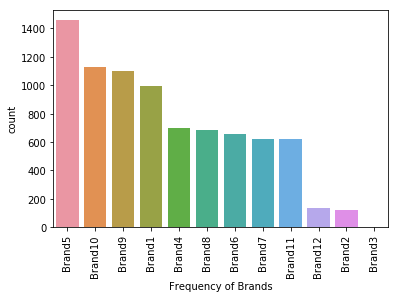

In [58]:
sns.barplot(x='brands',y='frequency',data=brand2_df)
plt.ylabel("count")
plt.xticks(rotation='vertical')
plt.xlabel("Frequency of Brands")
plt.show()

In [59]:
retail_df=df[['Retailer Name','Number of Brands','Total Sales']]
retail_df.head()

,Retailer Name,Number of Brands,Total Sales
0,Retailer 1,1,30826.6100
1,Retailer 2,3,67713.1692
2,Retailer 3,3,65006.4054
3,Retailer 4,0,0.0000
4,Retailer 5,0,0.0000


In [0]:
train_df=retail_df[:4000]

In [62]:
train_df.head()

,Retailer Name,Number of Brands,Total Sales
0,Retailer 1,1,30826.6100
1,Retailer 2,3,67713.1692
2,Retailer 3,3,65006.4054
3,Retailer 4,0,0.0000
4,Retailer 5,0,0.0000


In [66]:
train_df['Total Sales'].max()


7618234.588799999

In [70]:
retail_df['rating']=retail_df['Number of Brands']*retail_df['Total Sales']
retail_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Retailer Name,Number of Brands,Total Sales,rating
0,Retailer 1,1,30826.6100,30826.6100
1,Retailer 2,3,67713.1692,203139.5076
2,Retailer 3,3,65006.4054,195019.2162
3,Retailer 4,0,0.0000,0.0000
4,Retailer 5,0,0.0000,0.0000


In [74]:
retail_df['rating'].max()

38091172.944

In [73]:
unique_rating=retail_df[['rating']].drop_duplicates()
unique_rating['band']=pd.qcut(unique_rating['rating'],5)
unique_rating=unique_rating['band'].drop_duplicates()
unique_rating


0            (-0.001, 33486.665]
1         (135776.5, 272473.797]
12         (78283.986, 135776.5]
13    (272473.797, 38091172.944]
24        (33486.665, 78283.986]
Name: band, dtype: category
Categories (5, interval[float64]): [(-0.001, 33486.665] < (33486.665, 78283.986] <
                                    (78283.986, 135776.5] < (135776.5, 272473.797] <
                                    (272473.797, 38091172.944]]

In [75]:
def f(row):
  if row['rating']<=33486.665:
    val='E'
  elif row['rating']>33486.665 and row['rating']<=78283.986:
    val='D'
  elif row['rating']>78283.986 and row['rating']<=135776.5:
    val='C'
  elif row['rating']>135776.5 and row['rating']<=272473.797:
    val='B'
  else:
    val='A'
  return val

retail_df['Category of Retailer']=retail_df.apply(f,axis=1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [80]:
len(retail_df)

9938

In [0]:
df['Category of Retailer']=retail_df['Category of Retailer']

In [0]:
df.to_excel("Sorted data.xlsx")